# Como Colocar um Modelo de Machine Learning em Produção com Flask
## Começa 20:05

## Quer aprender a habilidade mais importante para trabalhar com Data Science? Acesse CursoDeDataScience.com

# DESAFIO: Mestres do Scikit-learn!

In [133]:
import flask

In [16]:
import pandas as pd
import numpy as np
%matplotlib inline

In [109]:
p = pd.read_csv("clickbait_titles.csv", index_col=0, parse_dates=['timestamp'])
n = pd.read_csv("non_clickbait_titles.csv", index_col=0,parse_dates=['timestamp'])
p['y'] = 1
n['y'] = 0

data = pd.concat([p,n], axis=0, ignore_index=True).sort_values("timestamp")

In [113]:
data.head()

,timestamp,title,url,y
801,2013-08-29 14:48:00,24 Coisas Que As Pessoas Solteiras Estão Cansa...,https://www.buzzfeed.com/ashleyperez/24-coisas...,1
800,2013-08-30 15:10:58,27 Decisões Do Dia-a-dia Que Pessoas De Vinte-...,https://www.buzzfeed.com/regajha/27-decisoes-d...,1
799,2013-09-04 12:07:03,21 Fotos Provando Que Os Irmãos Mais Velhos Tê...,https://www.buzzfeed.com/moerder/21-fotos-prov...,1
798,2013-09-04 16:06:57,30 Sinais De Que Você Tem Quase 30,https://www.buzzfeed.com/jessicamisener/30-sin...,1
1306,2013-10-18 03:29:53,38 Sinais Que Você é Um Basset Hound,https://www.buzzfeed.com/chelseamarshall/38-si...,1


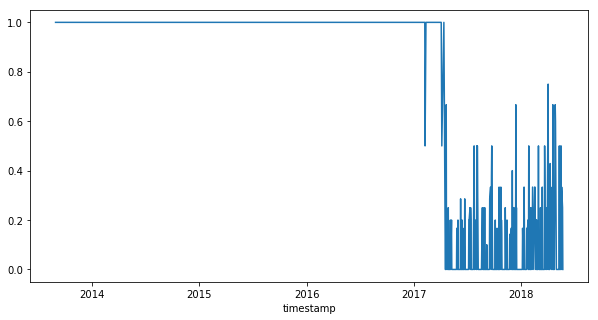

In [18]:
data.groupby(data['timestamp'].dt.date)['y'].mean().plot(figsize=(10,5))

In [20]:
data = data[data['timestamp'] >= "2017-06-01"]

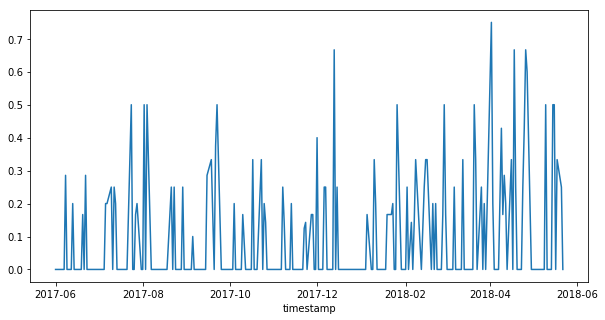

In [21]:
data.groupby(data['timestamp'].dt.date)['y'].mean().plot(figsize=(10,5))

In [24]:
data.head()

,timestamp,title,url,y
2222,2017-06-01 14:13:41,"Peça-chave na Lava Jato, Funaro negocia delaçã...",https://www.buzzfeed.com/filipecoutinho/peca-c...,0
2221,2017-06-01 14:38:39,"Após palestra-culto, o pastor-procurador de MS...",https://www.buzzfeed.com/tatianafarah/o-procur...,0
2220,2017-06-01 15:02:00,Polícia Federal vai chamar Haddad para depor s...,https://www.buzzfeed.com/alexandrearagao/opera...,0
2219,2017-06-01 19:16:59,Defesa de Dilma diz que chapa é única e que Te...,https://www.buzzfeed.com/tatianafarah/defesa-d...,0
2218,2017-06-01 22:04:20,Esses dois amigos do Rio tiraram uma selfie du...,https://www.buzzfeed.com/alexandrearagao/tirot...,0


In [117]:
data['title_proc'] = data['title'].str.lower().str.replace(r'[^\w\s]+', ' ')
data['title_proc'].head()

801     24 coisas que as pessoas solteiras estão cansa...
800     27 decisões do dia a dia que pessoas de vinte ...
799     21 fotos provando que os irmãos mais velhos tê...
798                    30 sinais de que você tem quase 30
1306                 38 sinais que você é um basset hound
Name: title_proc, dtype: object

In [118]:
data.shape

(2340, 5)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [51]:
Xtrain, ytrain = data['title_proc'].iloc[:data.shape[0] // 2], data['y'].iloc[:data.shape[0] // 2]
Xtest, ytest = data['title_proc'].iloc[data.shape[0] // 2:], data['y'].iloc[data.shape[0] // 2:]

In [119]:
ytrain.mean()

0.07766990291262135

In [120]:
base = np.ones(Xtest.shape[0]) * ytrain.mean()
log_loss(ytest, base)

0.44050839748966253

In [ ]:
novo remédio para combater a calvice
novo, remédio, para, combater, a, calvice,  novo remedio, remedio para, para combater, combater a, a calvice 

In [122]:
mdl = make_pipeline(TfidfVectorizer(min_df=1, ngram_range=(1,1)), 
                    RandomForestClassifier(n_estimators=1000, n_jobs=6, random_state=0))
mdl.fit(Xtrain, ytrain)
p = mdl.predict_proba(Xtest)[:,1]
log_loss(ytest, p)

0.24958750065851476

In [131]:
len(mdl.named_steps.tfidfvectorizer.vocabulary_)

756

In [132]:
mdl = make_pipeline(TfidfVectorizer(min_df=2, ngram_range=(1,1)), LogisticRegression(C=20.))
mdl.fit(Xtrain, ytrain)
p = mdl.predict_proba(Xtest)[:,1]
log_loss(ytest, p)

/Users/mario/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.23773372825597244

In [81]:
mdl = make_pipeline(TfidfVectorizer(min_df=2, ngram_range=(1,1)), LogisticRegression(C=20.))
mdl.fit(data['title_proc'], data['y'])

/Users/mario/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [82]:
import joblib as jb
jb.dump(mdl, "mdl.pkl.z")

['mdl.pkl.z']

# API Requests

In [134]:
import requests as r
import urllib.parse

In [164]:
#encoded = urllib.parse.quote("10 coisas fofas e baratinhas para alegrar a vida")
#encoded = urllib.parse.quote("Você não vai acreditar no segredo devastador que o filho de Leonardo, Zé Felipe, possui em sua vida")
#encoded = urllib.parse.quote("Homem é preso por descobrir segredo que ensina a falar inglês fluente em uma hora")
#encoded = urllib.parse.quote("pare de fumar em 5 dias")
#encoded = urllib.parse.quote("Aprenda machine learning em apenas 10 dias sem precisar estudar nada")
encoded =  urllib.parse.quote("Banco central anuncia queda na taxa de juros")

Google Optimize, Multi Armed Bandits

In [166]:
encoded

'Banco%20central%20anuncia%20queda%20na%20taxa%20de%20juros'

In [167]:
res = r.get("http://localhost:8000/?titulo={}".format(encoded))
res.text

'{"titulo": "Banco central anuncia queda na taxa de juros", "p": 0.007999256122400645}'

In [ ]:
@mariofilhoml

In [168]:
import json
json.loads(res.text)

{'titulo': 'Banco central anuncia queda na taxa de juros',
 'p': 0.007999256122400645}